In [1]:
from mlchartist.array_builder import full_dataset_randomised_arrays_
from mlchartist.preprocessing import train_test_split, thresholds_encoding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras import models

# Preprocessing

## Importing NASDAQ_100 Files

In [2]:
# Reads Nasdaq 100 components

nasdaq100 = pd.read_csv('../../raw_data/metadata/nasdaq100.csv', header=None)

In [3]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [13]:
# Samples n random companies from Nasdaq 100 list

rand_tickers = random.sample(nasdaq100_list, 5)

In [14]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 3000

for ticker in rand_tickers:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)
    

## Stocks in DataFrame

In [15]:
# Prints sample tickers list

for tick in rand_tickers:
    print(tick)

ADBE
CMCSA
DLTR
GOOGL
PCAR


## Threshold Encoding

In [16]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

#FIVE_TR = 0.0006
#TEN_TR = 0.0012
#TWENTY_TR = 0.0024

# Drops 'ADI' and 'OBV' from input columns
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']

joined_df = thresholds_encoding(joined_df)

#joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
#joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
#joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

In [17]:
joined_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,ADBE,1986-10-01,57.523855,50.000000,54.761905,-58035200.0,49049600,0.015385,31.226183,24.162357,...,0.011954,0.04,0.040000,0.400000,0.00,-0.038462,-0.074074,1,1,1
1,ADBE,1986-10-02,57.523855,25.000000,44.047619,-58483200.0,49497600,0.015714,30.385159,21.978650,...,0.011364,0.04,0.040000,0.360000,0.00,0.000000,-0.074074,1,1,1
2,ADBE,1986-10-03,57.523855,0.000000,25.000000,-58572800.0,49587200,0.016020,29.604207,20.029236,...,0.010766,0.04,0.040000,0.320000,0.00,0.000000,-0.074074,1,1,1
3,ADBE,1986-10-06,63.434871,33.333333,19.444444,-58828800.0,49843200,0.016305,28.879039,18.282881,...,0.010329,0.00,0.038462,0.269231,0.04,0.040000,0.000000,0,1,1
4,ADBE,1986-10-07,63.434871,33.333333,22.222222,-59225600.0,50240000,0.015854,28.205667,17.463017,...,0.009992,0.00,0.038462,0.230769,0.00,0.040000,0.040000,0,1,1


## Data Visualisation

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/bo

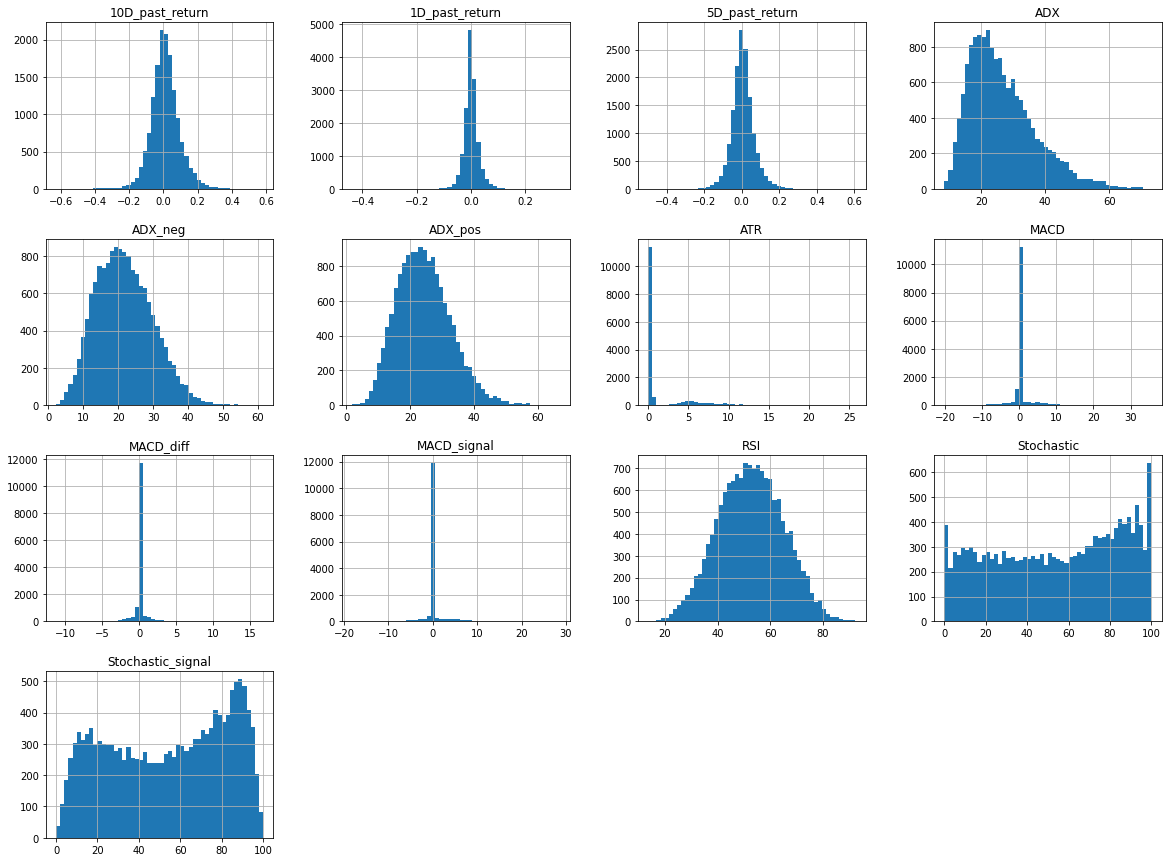

In [18]:
# Plots distribution of the input df without removing outliers

joined_df[INPUT_COLS].hist(figsize=(20, 15), bins=50)
plt.show()

## `train_x`, `train_y`, `test_x`, `test_y` Arrays Building

In [19]:

TARGET_COLS=['10D_return_bin']
outlier_validation={'1D_past_return': [-0.3, 0.3]}

stride = 1


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=False, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='2Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)

print('')
print('')
print('### Validation ###')


5 Companies in Dataset
Starting ADBE: Company 1 of 5
Starting CMCSA: Company 2 of 5
Starting DLTR: Company 3 of 5
Starting GOOGL: Company 4 of 5
Starting PCAR: Company 5 of 5
All Companies Completed

Processing Stats: {'ADBE': {'train_possible_windows': 2592.0, 'train_outliers': 89, 'train_windows': 2503, 'test_possible_windows': 408.0, 'test_outliers': 29, 'test_windows': 379}, 'CMCSA': {'train_possible_windows': 2619.0, 'train_outliers': 29, 'train_windows': 2590, 'test_possible_windows': 381.0, 'test_outliers': 29, 'test_windows': 352}, 'DLTR': {'train_possible_windows': 2689.0, 'train_outliers': 59, 'train_windows': 2630, 'test_possible_windows': 311.0, 'test_outliers': 29, 'test_windows': 282}, 'GOOGL': {'train_possible_windows': 2578.0, 'train_outliers': 29, 'train_windows': 2549, 'test_possible_windows': 422.0, 'test_outliers': 29, 'test_windows': 393}, 'PCAR': {'train_possible_windows': 2619.0, 'train_outliers': 29, 'train_windows': 2590, 'test_possible_windows': 381.0, 'test_o

## `X_train` & `y_train` Arrays Random Sampling

In [20]:
# Samples n rows of train_x

indx = list(range(len(train_x)))
sample_indx = random.sample(indx, 10000)
X_train_sample =  train_x[[sample_indx], :][0]
y_train_sample = train_y[[sample_indx]]

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [21]:
y_train_sample.shape

(10000, 1)

In [22]:
test_y.shape

(1758, 1)

# Modeling

## Model (commented)

from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax

optim = RMSprop(learning_rate=0.0001)
precision = Precision()

def init_model():
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(30,13), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es])

## Balance of `train_y` and `test_y`

In [23]:
train_y.sum()/len(train_y)

0.5352977763955838

In [24]:
test_y.sum()/len(test_y)

0.5278725824800911

## Trained Model Loading

In [27]:
!ls ../../models/

Nasdaq_random_50


In [25]:
model = models.load_model('../../models/Nasdaq_random_50')

OSError: SavedModel file does not exist at: ../../models/Nasdaq_random_50/{saved_model.pbtxt|saved_model.pb}

In [ ]:
model.summary()

## Model evaluation

In [59]:
model.evaluate(test_x, test_y)

47/47 [==============================] - 2s 32ms/step - loss: 1.4126 - precision_4: 0.5267 - accuracy: 0.4893


[1.4125611782073975, 0.5266821384429932, 0.4892905056476593]